In [2]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)

In [3]:
# Boosting and adaboost
import xgboost
import math
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn import tree, linear_model
# from sklearn.model_selection import train_test_split
# from sklearn.cross_validate import ShuffleSplit
from sklearn.metrics import explained_variance_score
# import sklearn.learning_curve as curves
from time import time
from sklearn.metrics import r2_score
import os

In [4]:
Data = pd.read_csv('all_water_pure_silicate_glass.csv')
Data.head(5).T

,0,1,2,3,4
Glass_number,glass_num_0,glass_num_0,glass_num_0,glass_num_0,glass_num_0
Filename,O_538_Si_597,O_1_Si_606,O_238_Si_614,O_430_Si_623,O_49_Si_627
Si_O_Si_Bond_angle,165.35545,134.179438,125.796872,167.970949,128.261568
O_Si_O_bond_angle,163.817986,161.834655,153.507315,158.208006,146.035677
number_bridge_oxygen,4,4,3,4,4
env_chem_si,4,4,3,4,4
env_chem_al,0,0,0,0,0
Activation_barrier,0.90306,1.125352,0.833951,1.166612,1.201377
initial_water_si_distance,3.254,3.273,3.396,3.278,3.321
Stress,-0.252007,-0.225995,-0.182279,-0.254495,-0.255139


In [5]:
Data.info()
Data.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Glass_number               671 non-null    object 
 1   Filename                   671 non-null    object 
 2   Si_O_Si_Bond_angle         671 non-null    float64
 3   O_Si_O_bond_angle          671 non-null    float64
 4   number_bridge_oxygen       671 non-null    int64  
 5   env_chem_si                671 non-null    int64  
 6   env_chem_al                671 non-null    int64  
 7   Activation_barrier         671 non-null    float64
 8   initial_water_si_distance  671 non-null    float64
 9   Stress                     671 non-null    float64
 10  Shear                      671 non-null    float64
dtypes: float64(6), int64(3), object(2)
memory usage: 57.8+ KB


,count,mean,std,min,25%,50%,75%,max
Si_O_Si_Bond_angle,671.0,150.645401,12.924740,119.834968,141.157668,150.294790,160.545405,179.169596
O_Si_O_bond_angle,671.0,160.703325,21.045397,48.899566,158.252058,165.669098,171.060808,179.070170
number_bridge_oxygen,671.0,3.506706,0.582993,2.000000,3.000000,4.000000,4.000000,4.000000
env_chem_si,671.0,3.506706,0.582993,2.000000,3.000000,4.000000,4.000000,4.000000
env_chem_al,671.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Activation_barrier,671.0,1.181833,0.367917,0.039732,0.965544,1.201798,1.433562,2.397001
initial_water_si_distance,671.0,3.238618,0.165312,2.521000,3.128500,3.262000,3.368500,3.500000
Stress,671.0,-0.222171,0.039805,-0.354108,-0.248546,-0.220659,-0.194752,-0.089500
Shear,671.0,0.104810,0.037367,0.018800,0.078450,0.100803,0.127220,0.255677


In [6]:
print(Data.columns)

Index(['Glass_number', 'Filename', 'Si_O_Si_Bond_angle', 'O_Si_O_bond_angle',
       'number_bridge_oxygen', 'env_chem_si', 'env_chem_al',
       'Activation_barrier', 'initial_water_si_distance', 'Stress', 'Shear'],
      dtype='object')


In [7]:
import numpy as np
from statsmodels.formula.api import ols
import pandas
import seaborn as sns

x = Data['Shear']
y = Data['Activation_barrier']

data = pandas.DataFrame({'x': x, 'y': y})
lm1 = ols("y ~ x", data).fit()
X_new = pandas.DataFrame({'x': [152.85183419]})

print('%.4f' %(lm1.pvalues['x']))

0.0001


In [8]:
X = Data.drop(['Activation_barrier', 'Stress', 'env_chem_al', 'Glass_number', 'Filename'], axis =1).values


In [9]:
Y = Data['Activation_barrier'].values

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=101)

print('Training set X size is :' + str(len(X_train)))
print('Training set Y size is :' + str(len(Y_train)))
      

Training set X size is :469
Training set Y size is :469


In [10]:
# Random forest
from sklearn.ensemble import RandomForestRegressor
rand_regr = RandomForestRegressor(n_estimators=400)
start = time()
rand_regr.fit(X_train, Y_train)
end=time()
train_time_rand=end-start
random=rand_regr.score(X_test, Y_test)
predictions = rand_regr.predict(X_test)
exp_rand = explained_variance_score(predictions, Y_test)



Train set MAE: 0.10096133161527161
Train set MSE: 0.016871327315512025
Train set RMSE: 0.12988967362924592
Train set VarScore: 0.8709557773837399
Test set MAE: 0.2990690583052351
Test set MSE: 0.14262292959579434
Test set RMSE: 0.37765451089030344
Test set VarScore: 0.019557552680611878
Train error is:14.98196232993674
Test error is:42.4973192713038


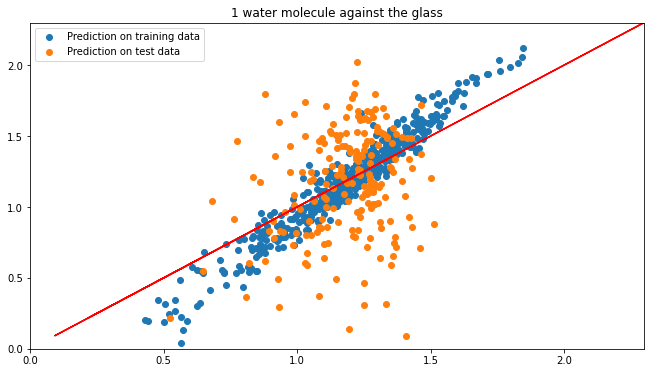

In [11]:
from sklearn import metrics

Y_train_pred = rand_regr.predict(X_train)
print('Train set MAE:', metrics.mean_absolute_error(Y_train, Y_train_pred))
print('Train set MSE:', metrics.mean_squared_error(Y_train, Y_train_pred))  
print('Train set RMSE:', np.sqrt(metrics.mean_squared_error(Y_train, Y_train_pred)))
print('Train set VarScore:',metrics.explained_variance_score(Y_train,Y_train_pred))


Y_pred = rand_regr.predict(X_test)
print('Test set MAE:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Test set MSE:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Test set RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('Test set VarScore:',metrics.explained_variance_score(Y_test,Y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(11,6))
plt.scatter(Y_train_pred, Y_train, label='Prediction on training data')
plt.scatter(Y_pred, Y_test, label='Prediction on test data')
plt.legend()
plt.title("1 water molecule against the glass")
plt.xlim(0, 2.3)
plt.ylim(0, 2.3)

print('Train error is:' + str(np.average((np.absolute(Y_train - Y_train_pred)/(Y_train)*100))))
print('Test error is:' + str(np.average((np.absolute(Y_test - Y_pred)/(Y_test)*100))))

# Perfect predictions
plt.plot(Y_test,Y_test,'r')
plt.savefig("test.png", dpi=300, facecolor='w')


In [12]:
Y_train = np.array([1, 2, 3, 4])
Y_pred = np.array([1, 2.5, 3.5, 4.2])

print('Train error is:' + str(np.average((np.absolute(Y_train - Y_pred)/(Y_pred))*100)))
print((np.absolute(Y_train-Y_pred)/Y_pred))


Train error is:9.761904761904763
[0.         0.2        0.14285714 0.04761905]
